In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt




In [13]:
df = pd.read_csv("cars.csv")

In [14]:
df.head()

,year,km_driven,fuel_type,seller_type,transmission,owner,selling_price
0,2004,56097,Petrol,Individual,Manual,Fourth & Above Owner,1623685
1,2018,33494,Electric,Individual,Automatic,Fourth & Above Owner,107028
2,2003,125503,CNG,Individual,Automatic,Third Owner,1581483
3,2003,72130,Electric,Individual,Automatic,First Owner,210799
4,2017,160462,Electric,Dealer,Automatic,Second Owner,314721


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           300 non-null    int64 
 1   km_driven      300 non-null    int64 
 2   fuel_type      300 non-null    object
 3   seller_type    300 non-null    object
 4   transmission   300 non-null    object
 5   owner          300 non-null    object
 6   selling_price  300 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 16.5+ KB


In [16]:
df.isnull().sum()

year             0
km_driven        0
fuel_type        0
seller_type      0
transmission     0
owner            0
selling_price    0
dtype: int64

In [17]:
df_encoded = pd.get_dummies(df,columns=["fuel_type", "seller_type", "transmission", "owner"],drop_first=True)

In [18]:
df_encoded.head()

X = df_encoded.drop("selling_price",axis=1)
y = df_encoded["selling_price"]

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("Eğitim seti boyutu: ",X_train.shape)
print("Test seti boyutu: ",X_test.shape)

Eğitim seti boyutu:  (240, 10)
Test seti boyutu:  (60, 10)


In [20]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [21]:
model.coef_

array([-1.59458459e+03,  8.02822807e-02,  3.04892714e+04,  1.07870391e+05,
       -7.29373643e+04,  1.28093122e+05, -6.06851441e+04, -1.96877374e+05,
       -1.33123567e+05, -1.47977652e+05])

In [22]:
model.intercept_

np.float64(4262447.590459149)

In [23]:
y_pred = model.predict(X_test)

In [25]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [26]:
mae

np.float64(605521.2762913588)

In [27]:
mse

np.float64(458037262181.26697)

In [28]:
r2

-0.288016493395268

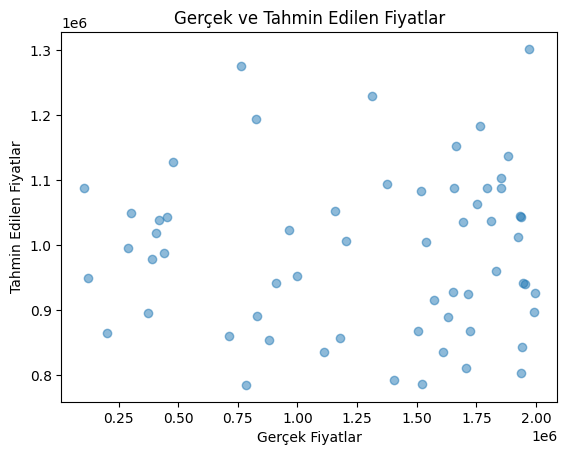

In [29]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("Gerçek Fiyatlar")
plt.ylabel("Tahmin Edilen Fiyatlar")
plt.title("Gerçek ve Tahmin Edilen Fiyatlar")
plt.show()

In [32]:
df_encoded["car_age"] = 2024 - df["year"]
X = df_encoded.drop(["selling_price", "year"], axis=1)

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {
    "n_estimators": [50,100,200],
    "max_depth"   : [None,10,20],
    "min_samples_split": [2,5,10]
}
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model,param_grid=param_grid,cv = 5,scoring="r2")
grid_search.fit(X_train,y_train)

print("En iyi parametreler: ",grid_search.best_params_)
best_model = grid_search.best_estimator_

En iyi parametreler:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


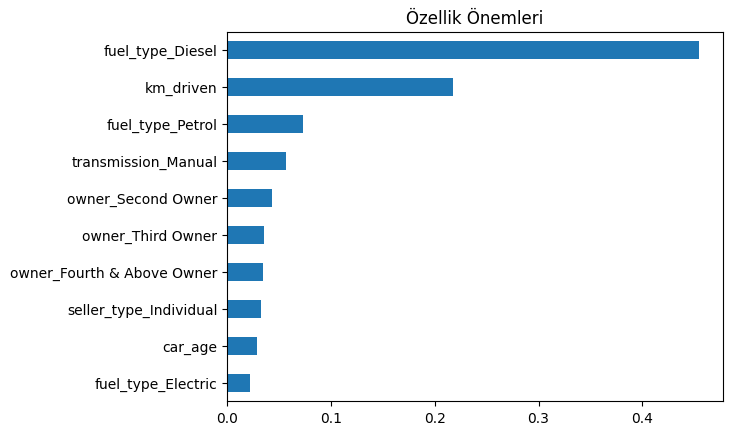

In [35]:
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind="barh", title="Özellik Önemleri")
plt.show()


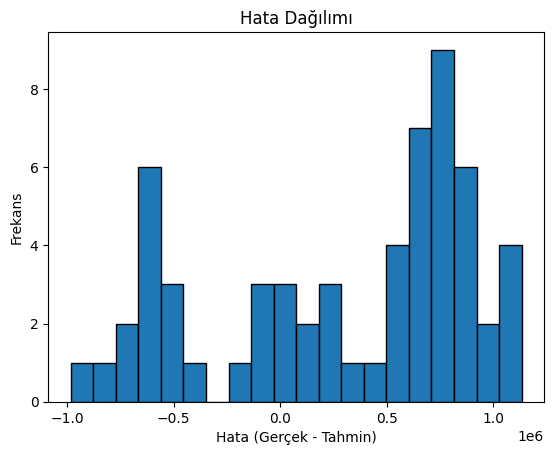

In [36]:
# Hata analizi
errors = y_test - y_pred
plt.hist(errors, bins=20, edgecolor="k")
plt.title("Hata Dağılımı")
plt.xlabel("Hata (Gerçek - Tahmin)")
plt.ylabel("Frekans")
plt.show()
